In [1]:
import sys
from pathlib import Path

In [2]:
ROOT = Path.cwd().parent
sys.path.append(str(ROOT))

In [3]:
# Temel
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
sns.set(style="whitegrid")
%matplotlib inline

import src.analysis.overview as ov

import src.data.load_data as dl

import src.visualization.plotting as vp

import src.analysis.outliers as ao

import src.analysis.grouping as ag

import src.data.clean_data as dc

import src.features.build_features as fb

import src.features.encode_scale as fes


In [4]:
import os
os.chdir("..")

In [5]:
df_ = dl.load_data(config_path="config/params.yaml")

In [6]:
df = df_.copy()

In [7]:
ov.data_overview(df)

Veri Seti Genel Bilgisi

Gözlem sayısı: 768
Özellik sayısı: 9
Sütunlar: ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME']

Veri Tipleri ve Bellek Kullanımı:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PREGNANCIES               768 non-null    int64  
 1   GLUCOSE                   768 non-null    int64  
 2   BLOODPRESSURE             768 non-null    int64  
 3   SKINTHICKNESS             768 non-null    int64  
 4   INSULIN                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DIABETESPEDIGREEFUNCTION  768 non-null    float64
 7   AGE                       768 non-null    int64  
 8   OUTCOME                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

T

# Hedef Değişken (Outcome) Dağılımı
Amaç: Veri dengesini kontrol etmek

C:\Users\omeru\Diabetes-Detector\src\visualization\plotting.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="OUTCOME", data=df, palette="Set2")


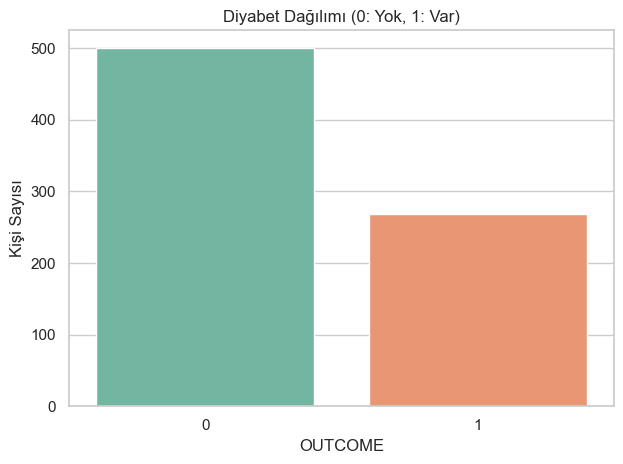

In [8]:
vp.plot_outcome_distribution(df)

# Sayısal Değişken Dağılımları
Amaç: Çarpıklık, uç değer ve dağılım yapısını görmek

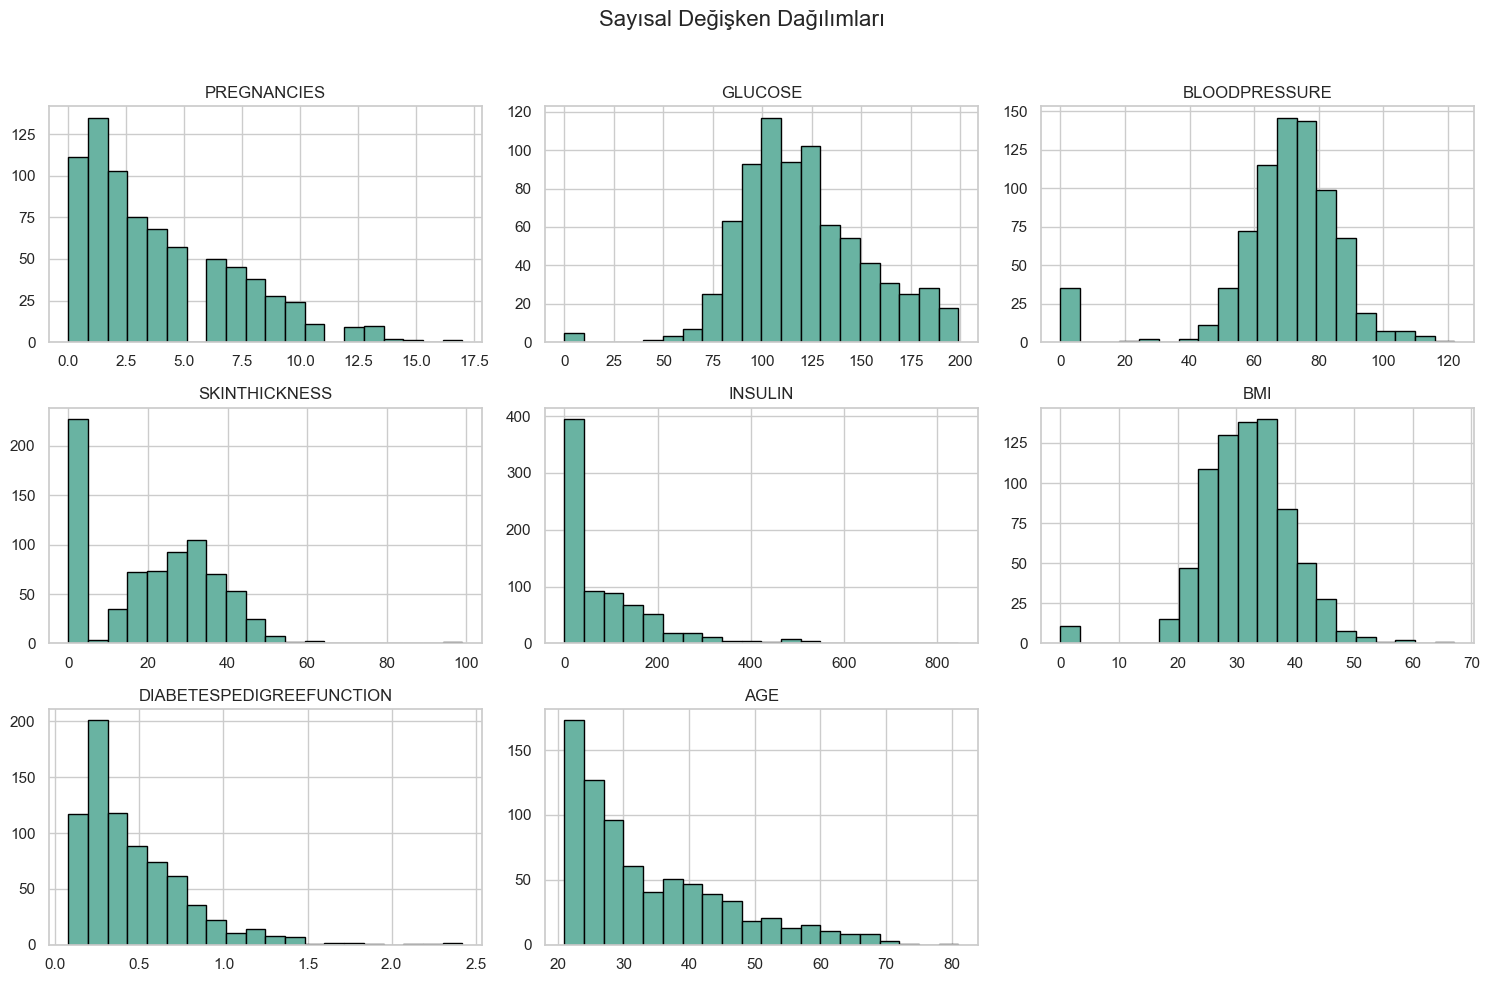

In [9]:
vp.plot_numeric_distributions(df)

# Boxplot ile Aykırı Değer Görselleştirme
Amaç: Hangi değişkenlerde uç değer var?

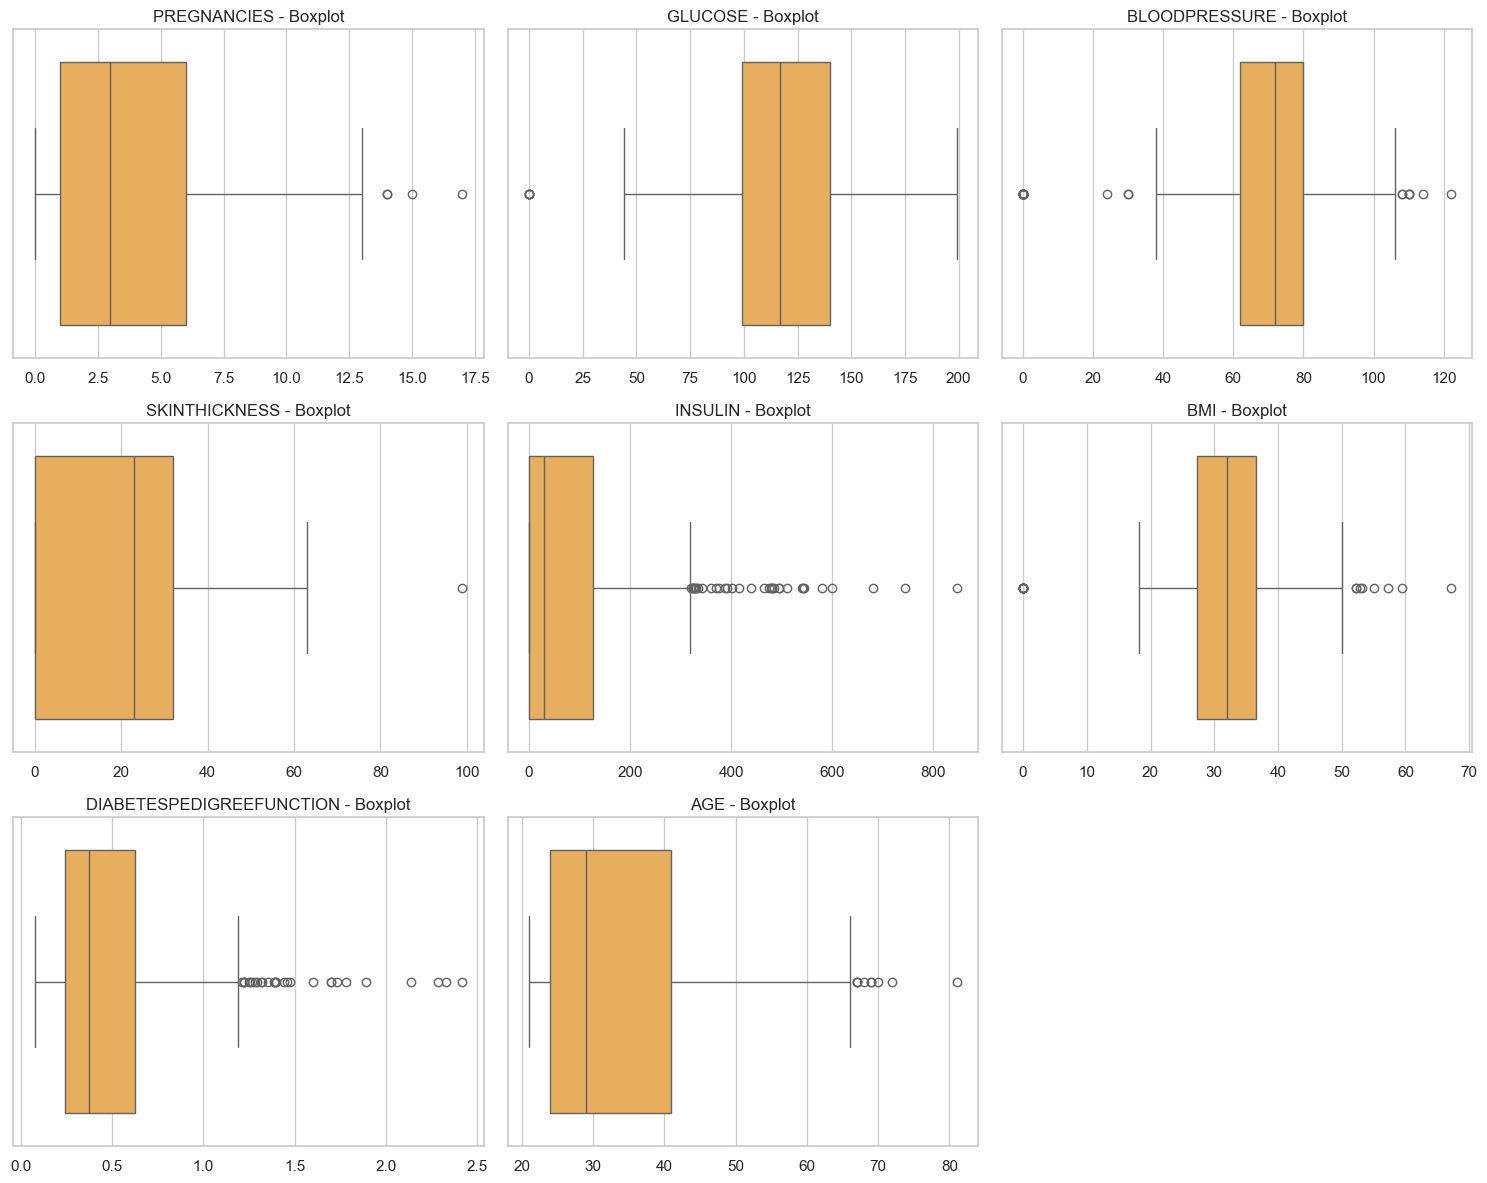

In [10]:
vp.plot_outlier_boxplots(df)

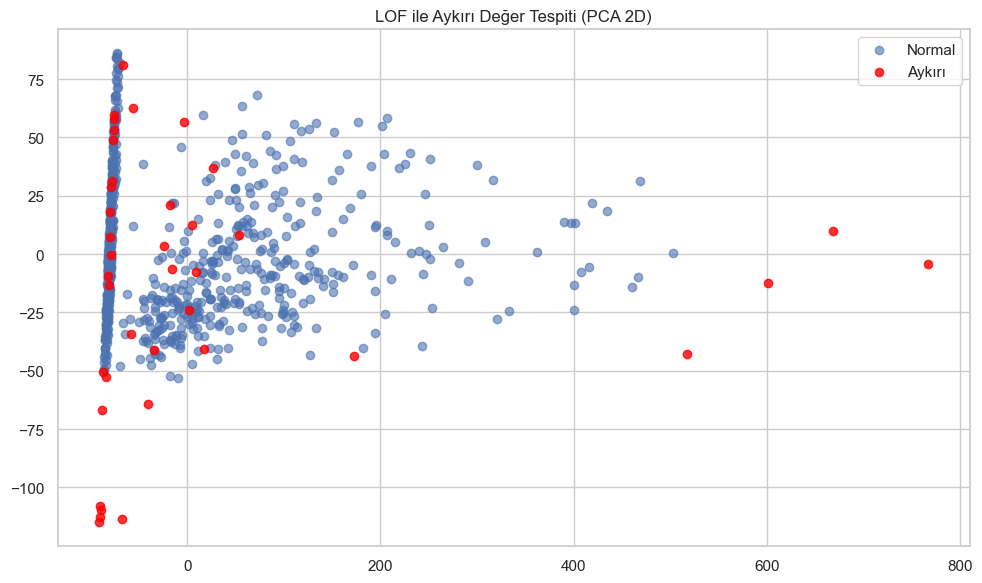

Aykırı gözlem sayısı: 39 (5.08%)


In [11]:
df_lof, lof_summary = ao.detect_lof_outliers(df)

print(f"Aykırı gözlem sayısı: {lof_summary['n_outliers']} ({lof_summary['outlier_ratio']:.2%})")

In [12]:
# OUTCOME'a göre aykırı dağılım
print(pd.crosstab(df_lof["OUTCOME"], df_lof["LOF_Outlier"]))

# Aykırı gözlemlerin istatistiksel özeti
df_lof[df_lof["LOF_Outlier"] == -1].describe().T

LOF_Outlier  -1    1
OUTCOME             
0            23  477
1            16  252


,count,mean,std,min,25%,50%,75%,max
PREGNANCIES,39.0,3.589744,3.725573,0.000,1.000,2.000,5.000,13.00
GLUCOSE,39.0,110.333333,59.087951,0.000,78.000,119.000,159.500,197.00
BLOODPRESSURE,39.0,69.102564,28.400144,0.000,58.000,70.000,81.000,122.00
SKINTHICKNESS,39.0,24.461538,21.536806,0.000,0.000,23.000,37.000,99.00
INSULIN,39.0,105.564103,217.847701,0.000,0.000,14.000,83.000,846.00
BMI,39.0,32.400000,15.814567,0.000,24.850,32.000,41.650,67.10
DIABETESPEDIGREEFUNCTION,39.0,0.552308,0.519365,0.096,0.264,0.389,0.647,2.42
AGE,39.0,38.282051,16.625834,21.000,25.000,36.000,47.500,81.00
OUTCOME,39.0,0.410256,0.498310,0.000,0.000,0.000,1.000,1.00
LOF_Outlier,39.0,-1.000000,0.000000,-1.000,-1.000,-1.000,-1.000,-1.00


# Korelasyon Matrisi
Amaç: Değişkenler arası ilişkiyi görmek

In [ ]:
vp.plot_correlation_matrix(df)

Outcome ile Korelasyonlar:

- Glucose (0.47): Diyabetin en güçlü belirleyicisi olarak öne çıkmaktadır. Bu, literatürdeki tanı kriterleriyle birebir örtüşmektedir.
- BMI (0.29), Age (0.24), Pregnancies (0.22): Orta düzeyde pozitif korelasyon göstermektedir. Bu da yaş, obezite ve gebelik geçmişinin diyabet riskini artıran faktörler olduğunu destekler.
- DiabetesPedigreeFunction (0.17): Genetik yatkınlığı temsil eder ve zayıf-orta düzeyde korelasyon gösterir.
- Insulin (0.13), SkinThickness (0.07), BloodPressure (0.07): Daha zayıf korelasyonlara sahiptir. Bu değişkenler diyabet riskine dolaylı yoldan katkı sağlıyor olabilir.


Değişkenler Arası Korelasyonlar:

- Multicollinearity riski düşüktür: Korelasyon matrisi genel olarak yüksek bağımlılık göstermemektedir.
- SkinThickness–Insulin (0.44) ve SkinThickness–BMI (0.39): Vücut yağ oranı ile insülin seviyesi ve deri kalınlığı arasında anlamlı bir ilişki olduğunu gösterir.
- Age–Pregnancies (0.54): Yaş arttıkça gebelik sayısının da artması beklenen bir durumdur ve bu ilişki güçlüdür.
- Glucose–Insulin (0.33) ve Glucose–BMI (0.22): Orta düzeyde korelasyonlar, glikozun metabolik faktörlerle ilişkili olduğunu gösterir.

# Outcome’a Göre Gruplama
Amaç: Diyabetli ve diyabetsiz bireylerin ortalama değer farklarını görmek

In [13]:
ag.groupby_outcome_means(df)

OUTCOME,0,1
GLUCOSE,109.980000,141.257463
INSULIN,68.792000,100.335821
BLOODPRESSURE,68.184000,70.824627
AGE,31.190000,37.067164
BMI,30.304200,35.142537
SKINTHICKNESS,19.664000,22.164179
PREGNANCIES,3.298000,4.865672
DIABETESPEDIGREEFUNCTION,0.429734,0.550500


# Özellik Bazlı Karşılaştırmalar
Amaç : Hedfe değişkene göre dağılım farklarını görmek

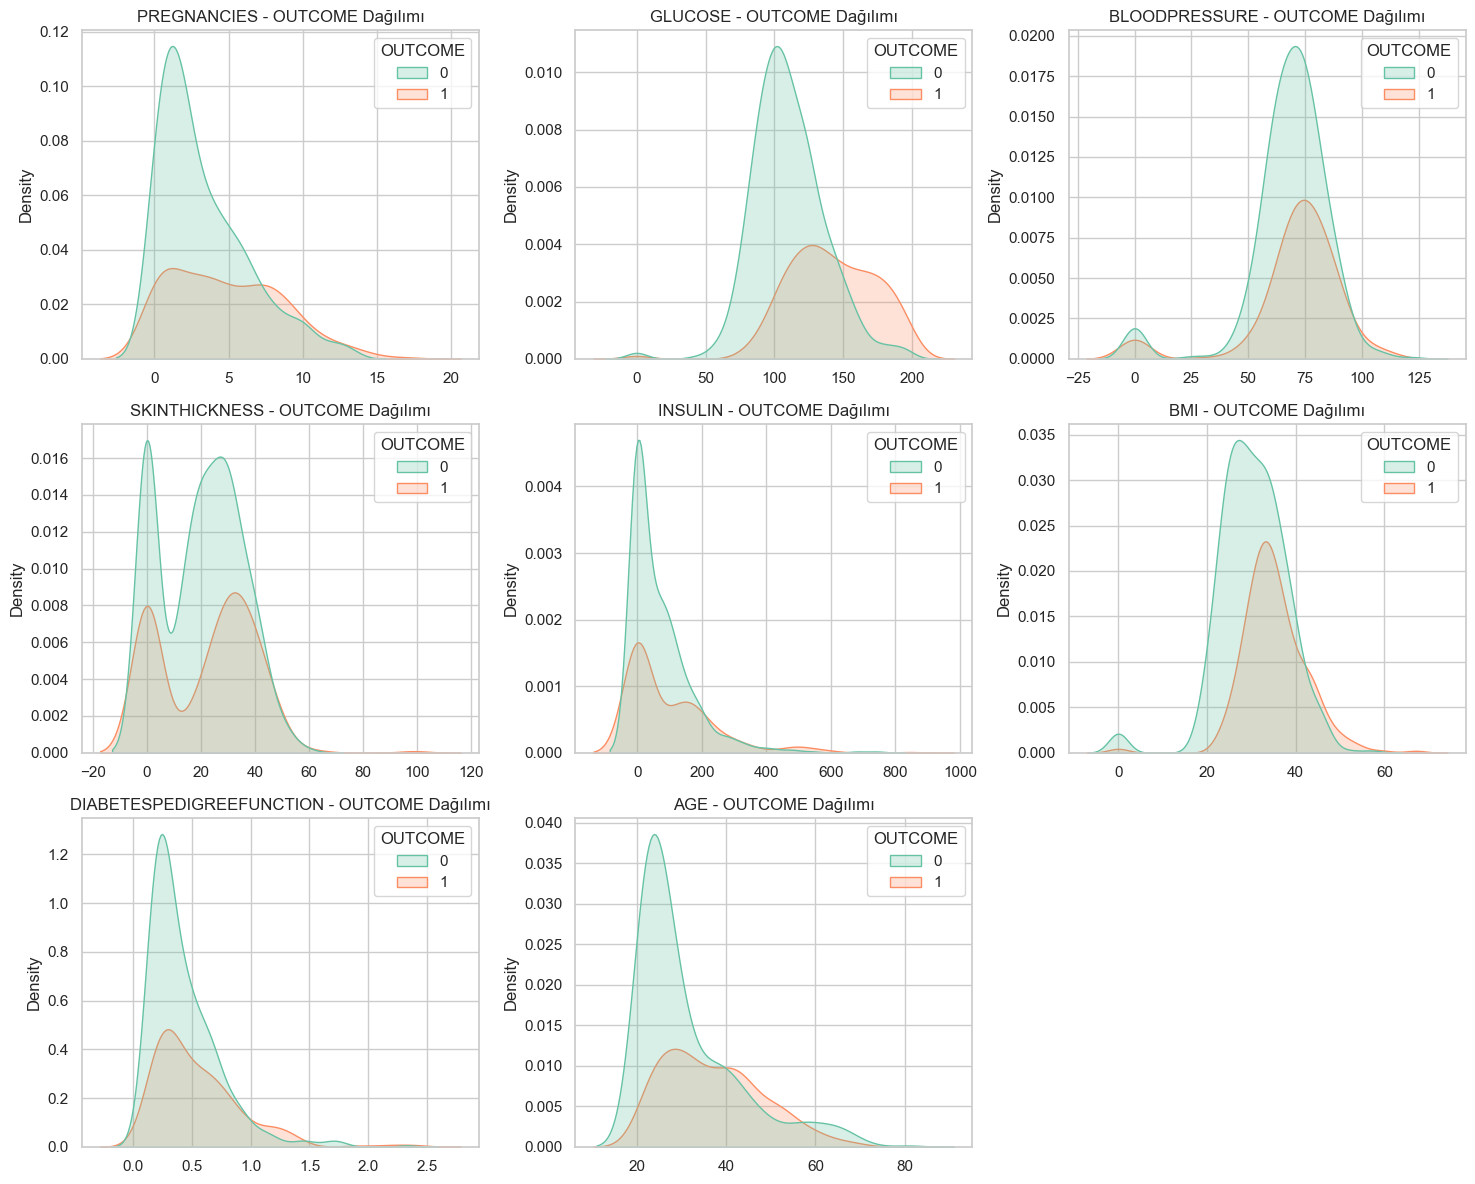

In [14]:
vp.plot_feature_distributions_by_target(df)

# Diyabet Hakkında


Diyabet, vücudun insülini yeterince üretememesi veya etkili şekilde kullanamaması sonucu ortaya çıkan kronik bir metabolik hastalıktır. En yaygın formu olan Tip 2 Diyabet (T2D), tüm diyabet vakalarının yaklaşık %90’ını oluşturur.


## Epidemiyolojik Gerçekler
- 2021 itibarıyla dünya genelinde 537 milyon yetişkin diyabetle yaşamaktadır. Bu sayının 2045’te 783 milyona ulaşması beklenmektedir.
- Diyabet, 2021 yılında 6.7 milyon ölüme neden olmuştur ve bu, küresel sağlık açısından ciddi bir tehdit oluşturmaktadır.
- Diyabetli bireylerin yaklaşık üçte biri, hastalığından habersizdir.
## Klinik Tanım ve Sınıflandırma
- Tip 1 Diyabet: Otoimmün beta hücre yıkımı sonucu insülin eksikliğiyle ortaya çıkar. Genellikle çocukluk veya ergenlikte başlar.
- Tip 2 Diyabet: İnsülin direnci ve/veya sekresyon bozukluğu ile karakterizedir. Yavaş ilerler ve genellikle geç teşhis edilir.
- Gestasyonel Diyabet: Gebelik sırasında ortaya çıkar, doğum sonrası kaybolabilir veya Tip 2’ye dönüşebilir.
## Tanı Kriterleri (ADA(Amerikan Diyabet Birliği) ve WHO(Dünya Sağlık Teşkilatı)’ya göre)

<table style="width:100%; border-collapse: collapse;">
  <thead>
    <tr style="background-color:#f2f2f2;">
      <th style="text-align:left; padding: 8px; border: 1px solid #ddd;">Test Türü</th>
      <th style="text-align:left; padding: 8px; border: 1px solid #ddd;">Diyabet Tanı Eşiği</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding: 8px; border: 1px solid #ddd;">Açlık Kan Şekeri</td>
      <td style="padding: 8px; border: 1px solid #ddd;">≥ 126 mg/dL</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ddd;">OGTT (2 saat sonrası)</td>
      <td style="padding: 8px; border: 1px solid #ddd;">≥ 200 mg/dL</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ddd;">HbA1c</td>
      <td style="padding: 8px; border: 1px solid #ddd;">≥ %6.5</td>
    </tr>
    <tr>
      <td style="padding: 8px; border: 1px solid #ddd;">Rastgele Kan Şekeri</td>
      <td style="padding: 8px; border: 1px solid #ddd;">≥ 200 mg/dL + semptomlar</td>
    </tr>
  </tbody>
</table>

## Öne Çıkan Bulgular
- Glukoz seviyesi, diyabetin en güçlü belirleyicisidir.
- BMI, yaş, aile öyküsü ve fiziksel inaktivite, Tip 2 diyabet riskini artıran başlıca faktörlerdir.
- İnsülin direnci, Tip 2 diyabetin temel fizyopatolojik mekanizmasıdır.

# Genel değerlendirme & Yorum 

1. PREGNANCIES
- Ortalama: 3.84  Maksimum: 17
- Gebelik sayısı 0–17 arasında değişiyor, bu makul bir aralık.
- Ancak 10 üzeri değerler uç değer olabilir (nadir gözlemler).
- Gebelik sayısı yaş ve hormonal değişimlerle ilişkili olduğu için diyabet riskini etkileyebilir.

2. GLUCOSE (Plazma Glikoz Seviyesi)
- Ortalama: 120.89  Medyan: 117  Minimum: 0   Maksimum: 199
- 0 değeri fizyolojik olarak imkânsız → eksik veri olarak işaretlenmeli.
    - 75 yüzdelik dilim: 140 → bu değer diyabet tanı eşiğinin (≥126 mg/dL) üzerinde.
- Glikoz seviyesi, diyabetin en güçlü belirleyicilerinden biridir.

3. BLOODPRESSURE (Diyastolik Kan Basıncı)
- Ortalama: 69.1  Medyan: 72  Minimum: 0   Maksimum: 122
- 0 değeri geçersizdir → eksik veri olarak ele alınmalı.
    - 25–75. yüzdelik dilim: 62–80 → normal aralıkta.
- 100 üzeri değerler uç değer olabilir.

4. SKINTHICKNESS (Deri Kalınlığı)
- Ortalama: 20.5  Medyan: 23  Minimum: 0   Maksimum: 99
- 0 değeri eksik veri olarak kabul edilmeli.
    - 75 yüzdelik dilim: 32 → literatürdeki normal aralığa uygun.
- Maksimum 99 değeri oldukça uç bir değer olabilir.

5. INSULIN (2 Saatlik Serum İnsülin)
- Ortalama: 79.8  Medyan: 30.5  Minimum: 0   Maksimum: 846
- 0 değeri eksik veri anlamına gelir.
- Medyanın çok düşük olması, eksik değerlerin çokluğunu gösteriyor.
- Maksimum 846 değeri uç değer olarak değerlendirilmeli.
- Eksik oranı yüksekse bu değişken modele dahil edilmeden önce dikkatle işlenmeli.

6. BMI (Vücut Kitle İndeksi)
- Ortalama: 31.99  Medyan: 32  Minimum: 0   Maksimum: 67.1
- 0 değeri geçersizdir → eksik olarak işaretlenmeli.
    - 75 yüzdelik dilim: 36.6 → obezite sınırının üzerinde.
- BMI, glikozla birlikte en güçlü belirleyicilerden biridir.

7. DIABETESPEDIGREEFUNCTION (Genetik Risk Fonksiyonu)
- Ortalama: 0.47  Medyan: 0.37  Minimum: 0.078  Maksimum: 2.42
- Bu değişken, bireyin genetik yatkınlığını temsil eden bir fonksiyondur.
- Bazı kaynaklarda bu fonksiyon, OGTT sonuçlarıyla ilişkilendirilerek türetilmiş olabilir.
- 1.0 üzeri değerler yüksek risk göstergesi olarak kabul edilebilir.
- Eksik değer içermez ve 0 değeri anlamlıdır.

8. AGE (Yaş)
- Ortalama: 33.24  Medyan: 29  Minimum: 21  Maksimum: 81
- Genç bireyler çoğunlukta (25–75. yüzdelik: 24–41)
- 60 yaş üzeri bireyler azınlıkta olabilir → modelin yaşlı bireylerde genelleme yeteneği sınırlı olabilir.
- Yaş, diyabet riskini artıran temel faktörlerden biridir.

9. OUTCOME (Hedef Değişken)
- Ortalama: 0.35 → Veri setinde %35 oranında diyabetli birey var.
- Dengesiz sınıf problemi çok ciddi değil, ancak dikkat edilmeli.

# Yol Haritası

1. Veri Temizleme ve Eksik Değer İşleme


Hedef: Fiziksel olarak geçersiz değerleri NaN ile değiştirip uygun şekilde doldur
- Glucose, BloodPressure, SkinThickness, Insulin, BMI sütunlarındaki 0 değerlerini NaN ile değiştir.
- Eksik değer oranlarını analiz et.
- Doldurma stratejisi:
    - KNN imputation

2. Aykırı Değer Yönetimi (LOF Tabanlı)


Amaç: LOF ile tespit edilen aykırı gözlemleri anlamlı şekilde değerlendir
- LOF ile %5.08 oranında aykırı gözlem tespit edildi.
- Aykırılar hem Outcome=0 hem Outcome=1 sınıflarında dengeli dağılmış.
- Aykırı gözlemler anlamlı değerler taşıyor (örneğin yüksek yaş, yüksek insülin).

Karar: Aykırı gözlemleri silmek yerine işaretle.

- is_outlier sütununu modelde özellik olarak kullan veya modelleme senaryolarında karşılaştır.


3. Özellik Mühendisliği


Amaç: Modelin öğrenmesini kolaylaştıracak yeni değişkenler üret
- Age → yaş grubu (örneğin: genç, orta, yaşlı)
- BMI → kategorik sınıflar (normal, fazla kilolu, obez)
- Pregnancies → 0 mı değil mi (binary)
- Glucose → diyabet tanı eşiğine göre sınıf (≥126)
- is_outlier → LOF çıktısına göre aykırılık bilgisi


4. Modelleme ve Değerlendirme


Amaç: Farklı algoritmalarla tahmin modeli kur ve karşılaştır
- Lojistik Regresyon (baseline)
- Random Forest / XGBoost
- KNN veya SVM (ölçeklendirme yap)
- ROC AUC, F1-score, Precision-Recall gibi metriklerle değerlendir
- Confusion Matrix ile yorumla
- Aykırı gözlemlerle ve aykırılar olmadan model performansını karşılaştır

# CLEAN DATA

In [15]:
import missingno as msno

In [16]:
df_none, df_cleaned = dc.clean_diabetes_data(df_)

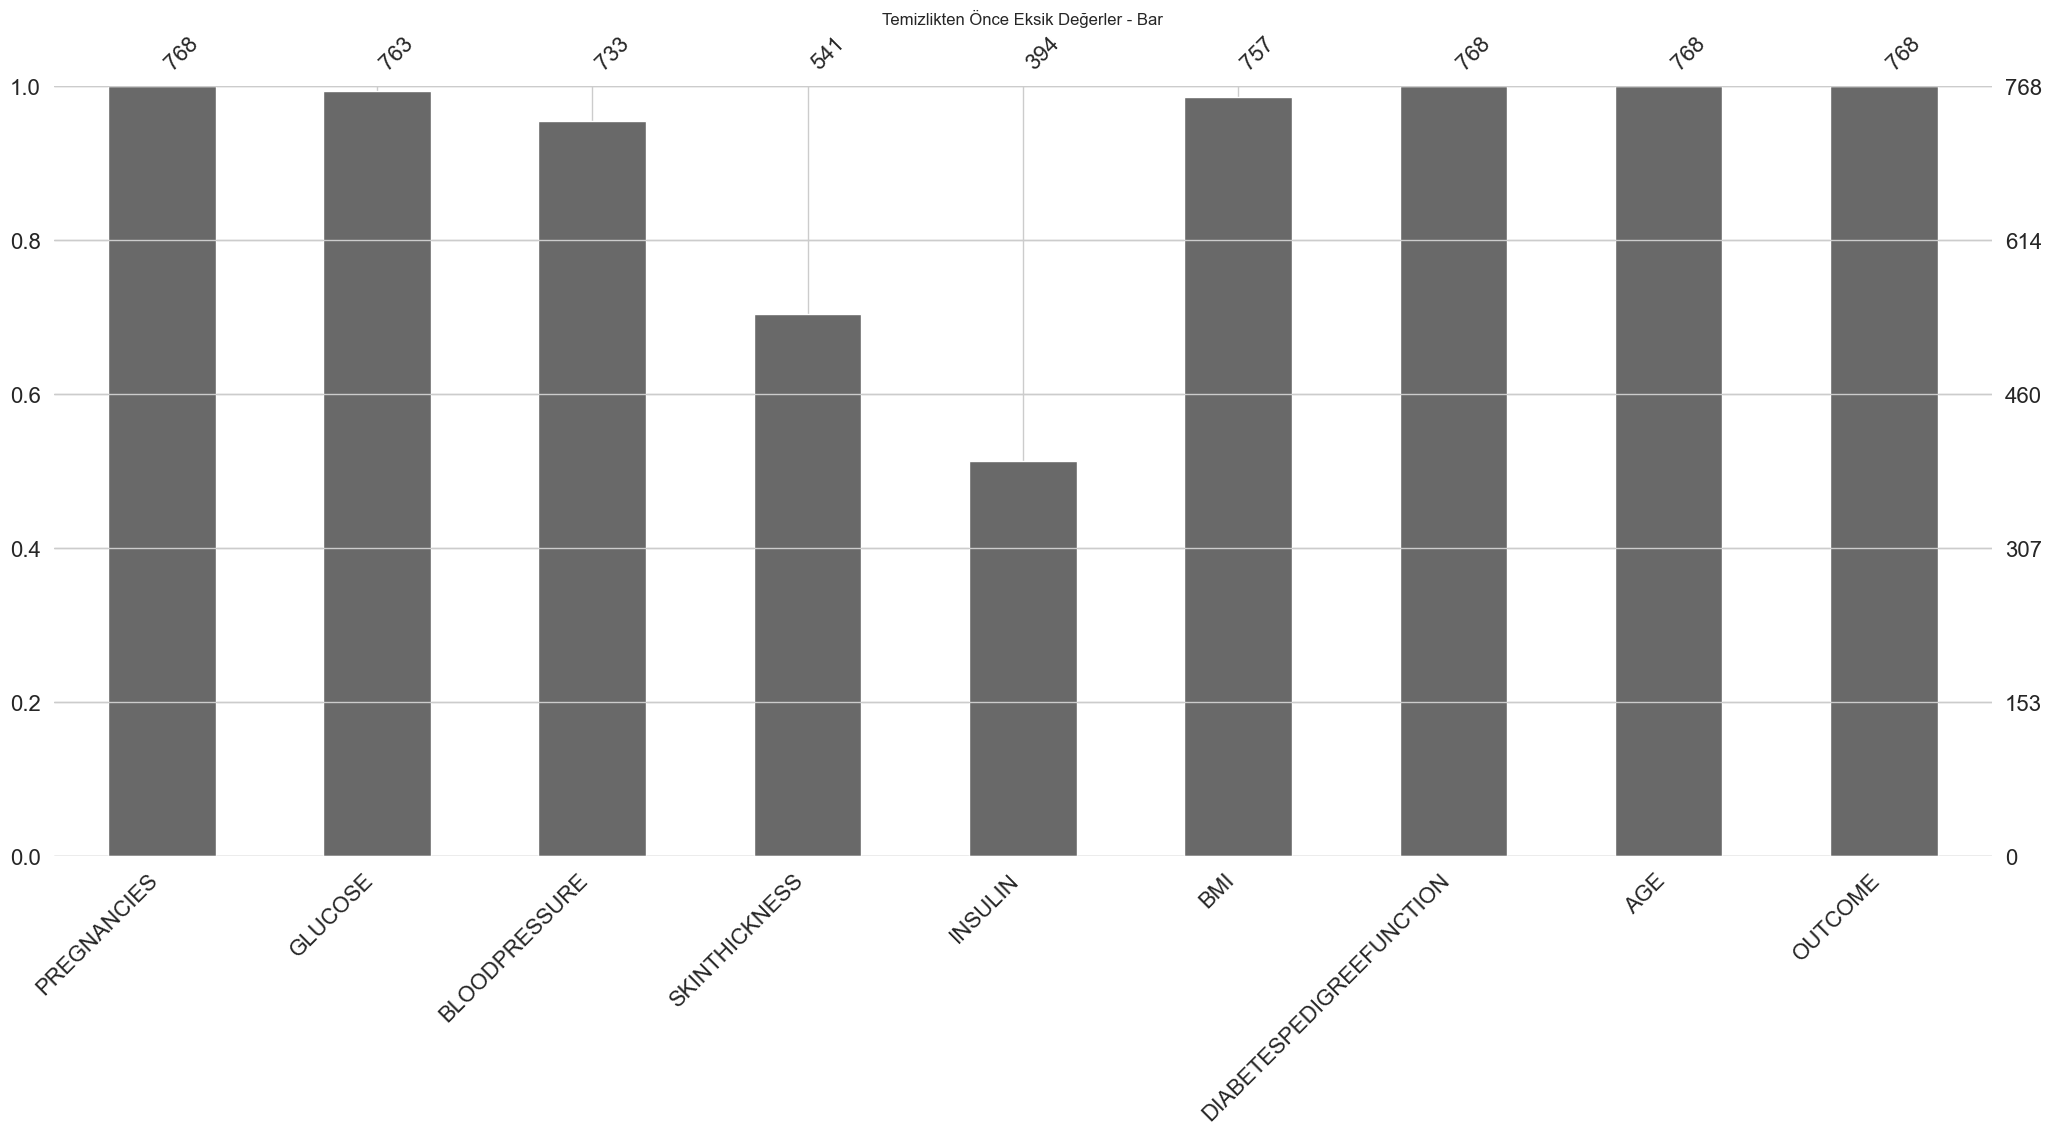

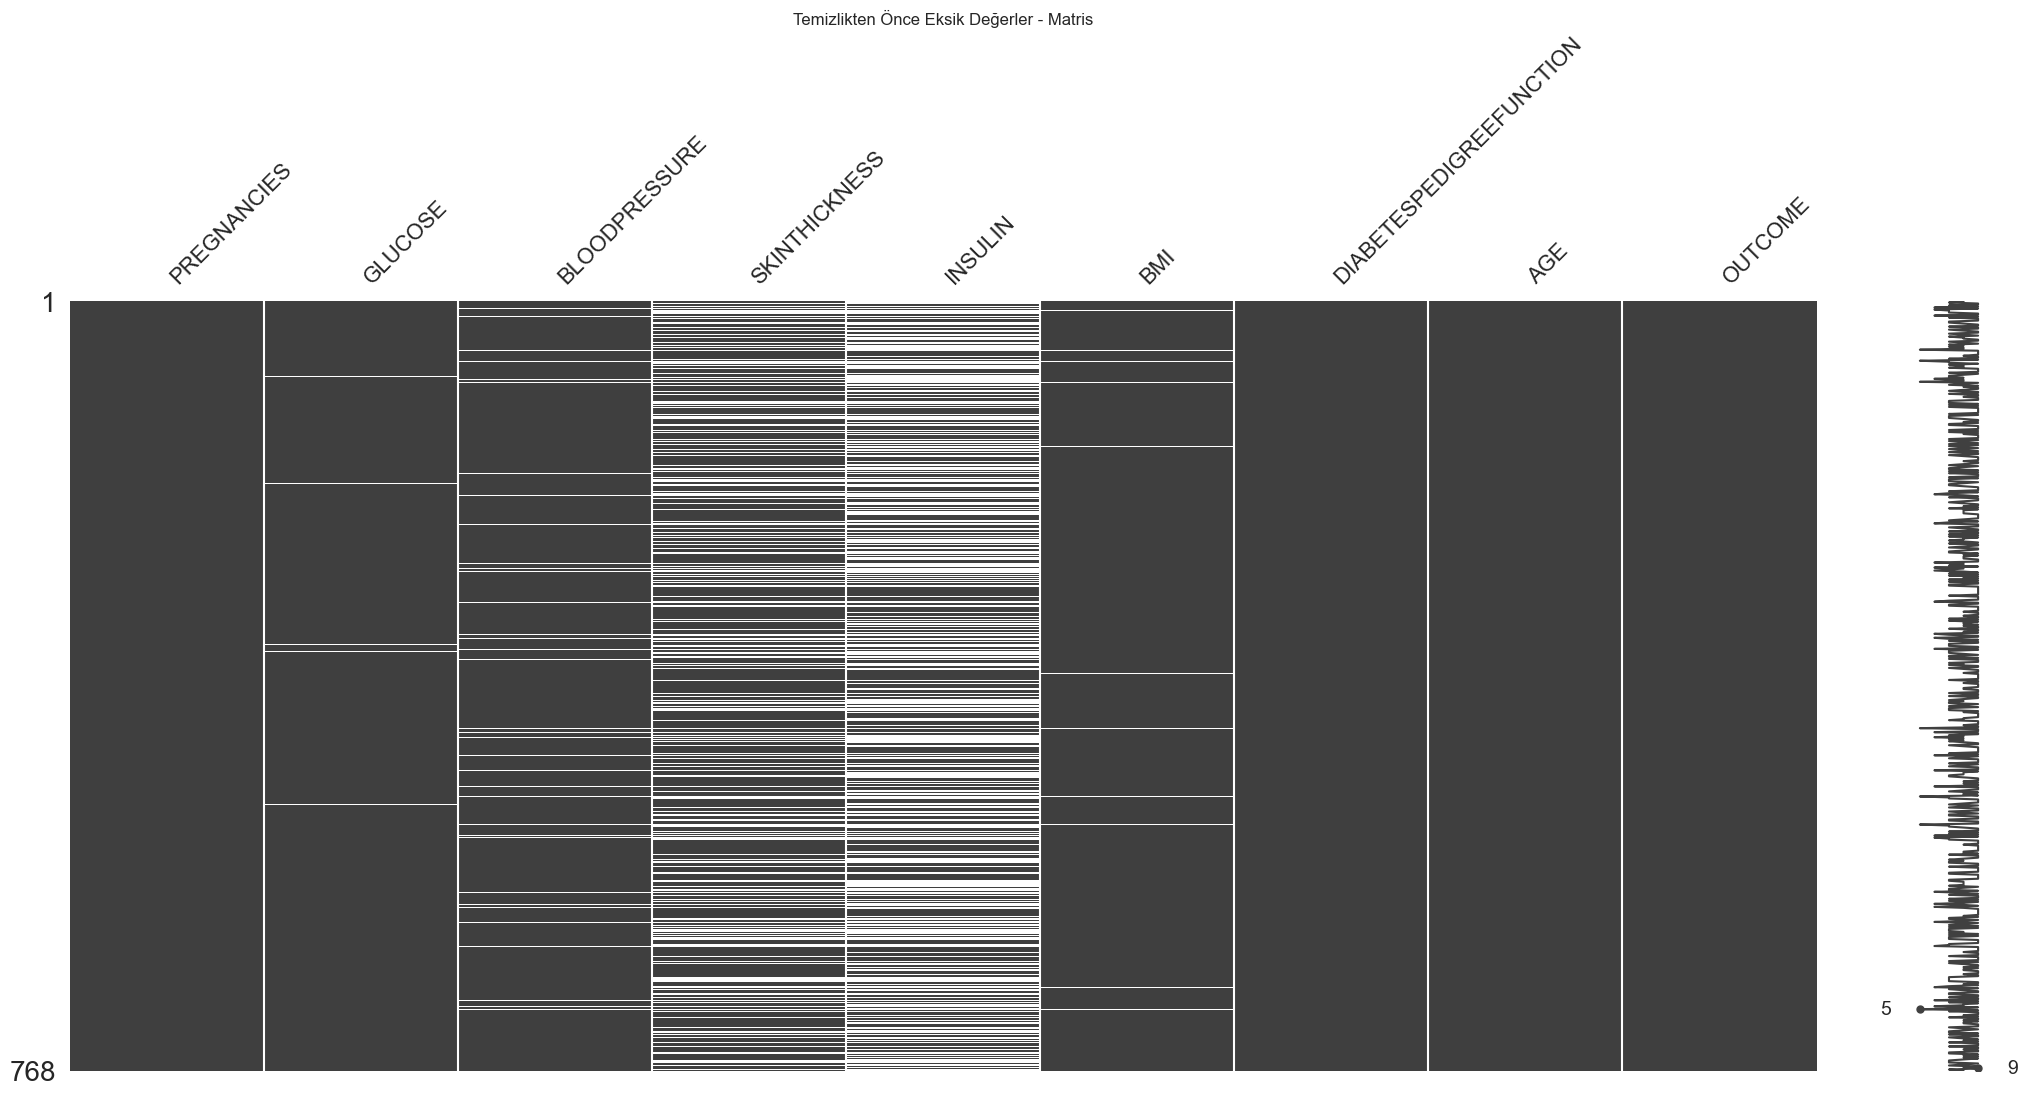

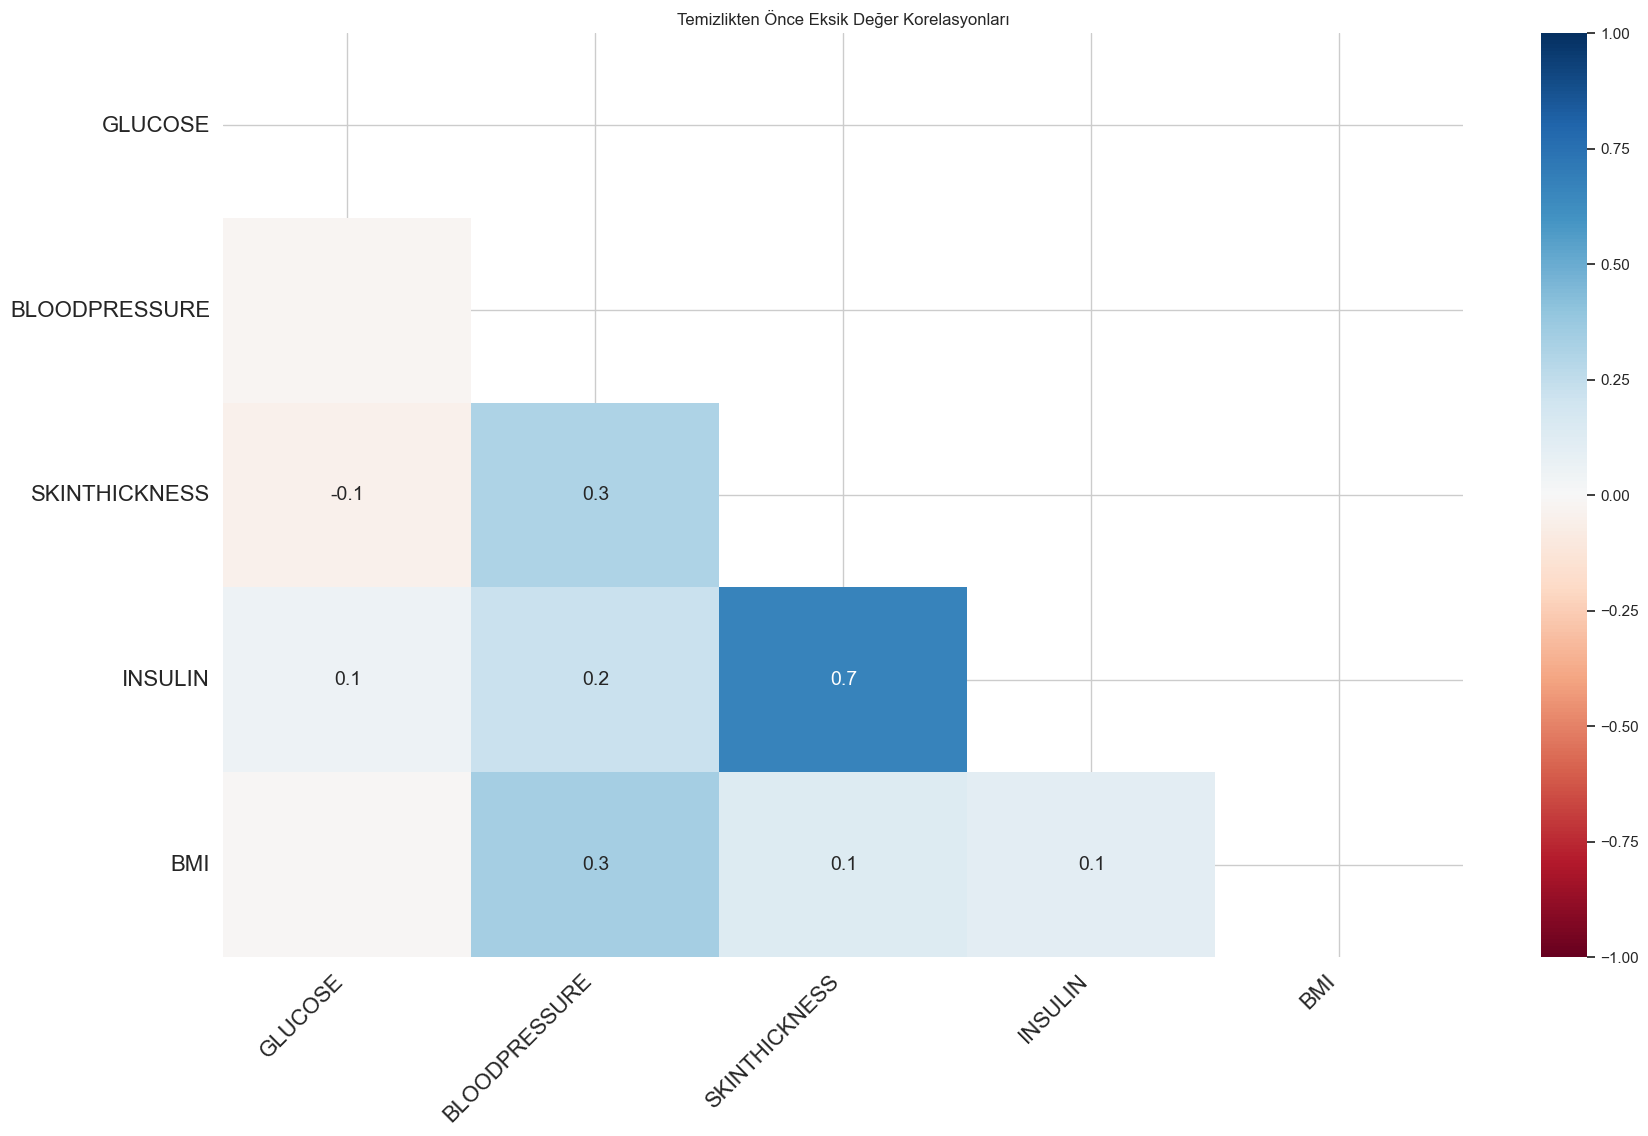

In [17]:
vp.visualize_missing_values(df_none, title_prefix="Temizlikten Önce ")

In [31]:
print("Temizlikten sonra eksik değer var mı?\n", df_cleaned.isnull().sum())

Temizlikten sonra eksik değer var mı?
 PREGNANCIES                 0
GLUCOSE                     0
BLOODPRESSURE               0
SKINTHICKNESS               0
INSULIN                     0
BMI                         0
DIABETESPEDIGREEFUNCTION    0
AGE                         0
OUTCOME                     0
dtype: int64


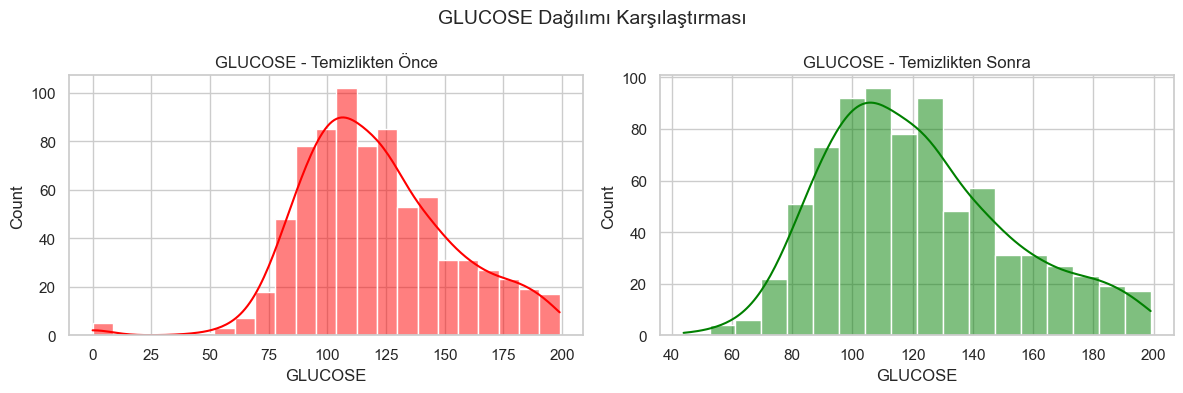

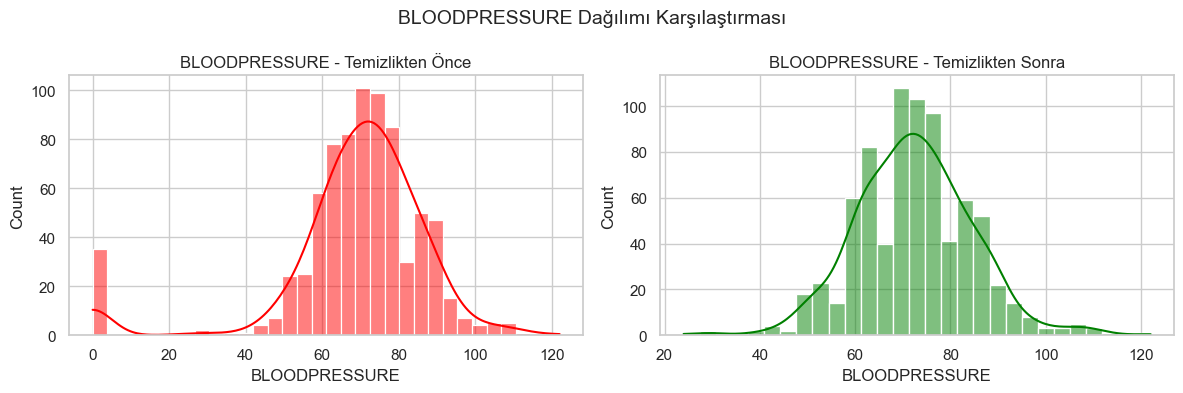

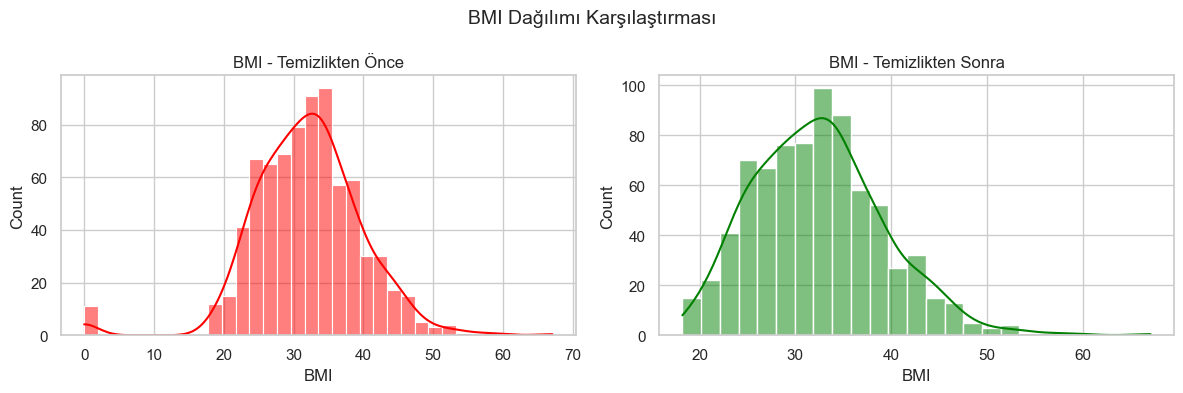

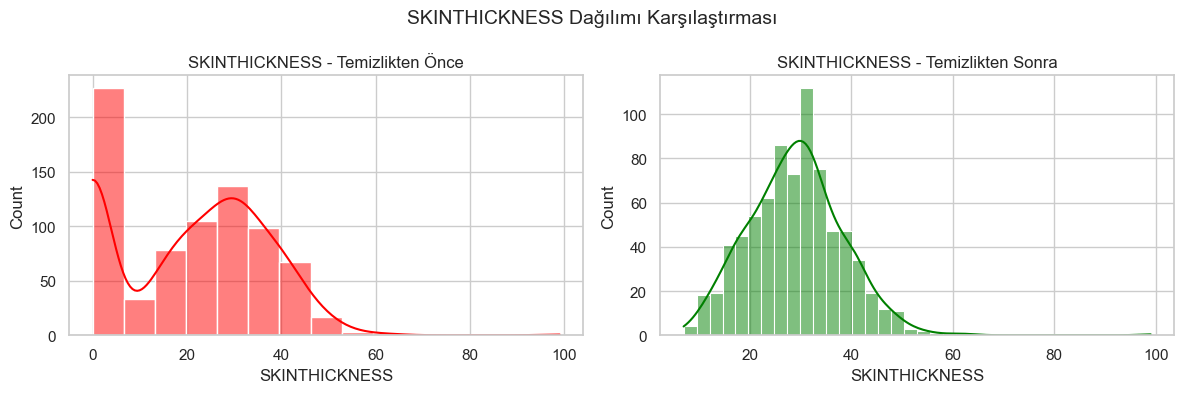

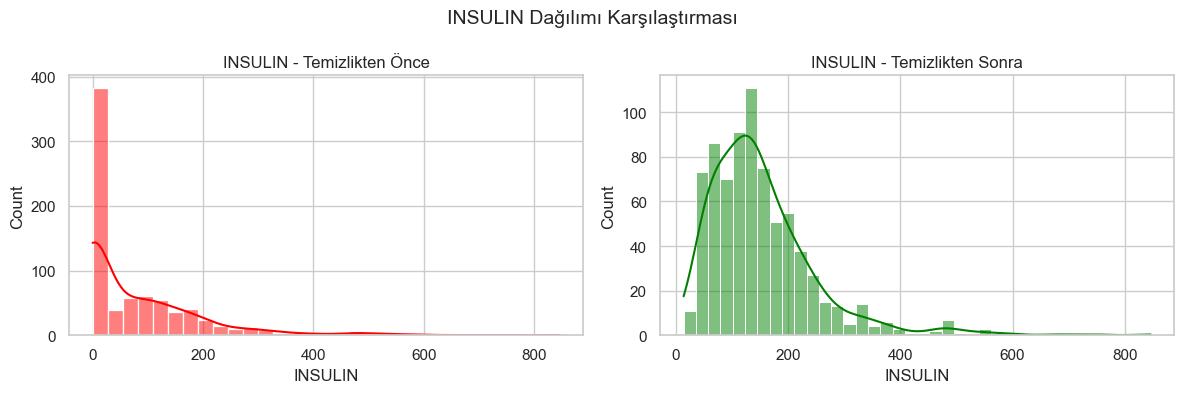

In [32]:
columns_to_compare = ["GLUCOSE", "BLOODPRESSURE", "BMI", "SKINTHICKNESS", "INSULIN"]
vp.compare_distributions_before_after(df_, df_cleaned, columns_to_compare)

In [33]:
desc_before, desc_after = ov.compare_descriptive_stats(df_, df_cleaned, columns_to_compare)
print(desc_before)
print(desc_after)

          GLUCOSE  BLOODPRESSURE         BMI  SKINTHICKNESS     INSULIN
count  768.000000     768.000000  768.000000     768.000000  768.000000
mean   120.894531      69.105469   31.992578      20.536458   79.799479
std     31.972618      19.355807    7.884160      15.952218  115.244002
min      0.000000       0.000000    0.000000       0.000000    0.000000
25%     99.000000      62.000000   27.300000       0.000000    0.000000
50%    117.000000      72.000000   32.000000      23.000000   30.500000
75%    140.250000      80.000000   36.600000      32.000000  127.250000
max    199.000000     122.000000   67.100000      99.000000  846.000000
          GLUCOSE  BLOODPRESSURE         BMI  SKINTHICKNESS     INSULIN
count  768.000000     768.000000  768.000000     768.000000  768.000000
mean   121.598177      72.383333   32.424922      29.104427  153.061979
std     30.496543      12.206858    6.885871       9.422976   98.271557
min     44.000000      24.000000   18.200000       7.000000   14

In [34]:
filled_summaries = ov.summarize_filled_values(df_, df_cleaned, columns_to_compare)
for col, summary in filled_summaries.items():
    print(f"\n{col} - Doldurulan Değer Özeti:\n{summary}")


GLUCOSE - Doldurulan Değer Özeti:
count      5.0000
mean     108.0800
std       21.8644
min       87.8000
25%       90.6000
50%       98.8000
75%      130.4000
max      132.8000
Name: GLUCOSE, dtype: float64

BLOODPRESSURE - Doldurulan Değer Özeti:
count    35.000000
mean     71.925714
std       7.769334
min      54.000000
25%      66.900000
50%      71.600000
75%      77.000000
max      84.800000
Name: BLOODPRESSURE, dtype: float64

BMI - Doldurulan Değer Özeti:
count    11.000000
mean     30.185455
std       2.391118
min      26.800000
25%      28.220000
50%      29.660000
75%      31.940000
max      33.880000
Name: BMI, dtype: float64

SKINTHICKNESS - Doldurulan Değer Özeti:
count    227.000000
mean      28.987665
std        6.248952
min       14.400000
25%       24.800000
50%       29.000000
75%       33.100000
max       48.400000
Name: SKINTHICKNESS, dtype: float64

INSULIN - Doldurulan Değer Özeti:
count    374.000000
mean     150.442781
std       70.574425
min       40.800000
2

1. GLUCOSE (Eksik: 5 gözlem)
- Değerlendirme:
    - Değerler gerçekçi aralıkta
    - Varyasyon yeterli
    - KNN, az sayıda eksik olmasına rağmen anlamlı değerler üretmiş

2. BLOODPRESSURE (Eksik: 35 gözlem)
- Değerlendirme:
    - Ortalama ve medyan, genel dağılımla uyumlu
    - Varyasyon doğal → KNN başarılı

3. BMI (Eksik: 11 gözlem)
- Değerlendirme:
    - Değerler sağlıklı/obez sınırlarında
    - Varyasyon yeterli
    - KNN burada da dengeli çalışmış

4. SKINTHICKNESS (Eksik: 227 gözlem)
- Değerlendirme:
    - Geniş ve doğal dağılım → bağlam sütunları işe yaramış

5. INSULIN (Eksik: 374 gözlem)
- Değerlendirme:
    - Geniş varyasyon → gerçek veriye benzer
    - Ortalama ve medyan dengeli
    - KNN burada da başarılı

<h3>🧠 Genel Sonuç</h3>
<table style="border-collapse: collapse; width: 70%; font-family: Arial, sans-serif;">
  <thead>
    <tr style="background-color: #f2f2f2;">
      <th style="border: 1px solid #ddd; padding: 8px;">Değişken</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Eksik Sayısı</th>
      <th style="border: 1px solid #ddd; padding: 8px;">KNN Başarısı</th>
      <th style="border: 1px solid #ddd; padding: 8px;">Not</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">GLUCOSE</td>
      <td style="border: 1px solid #ddd; padding: 8px;">5</td>
      <td style="border: 1px solid #ddd; padding: 8px;">✅</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Gerçekçi dağılım</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">BLOODPRESSURE</td>
      <td style="border: 1px solid #ddd; padding: 8px;">35</td>
      <td style="border: 1px solid #ddd; padding: 8px;">✅</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Dengeli</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">BMI</td>
      <td style="border: 1px solid #ddd; padding: 8px;">11</td>
      <td style="border: 1px solid #ddd; padding: 8px;">✅</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Homojen</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">SKINTHICKNESS</td>
      <td style="border: 1px solid #ddd; padding: 8px;">227</td>
      <td style="border: 1px solid #ddd; padding: 8px;">✅</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Önceki sorunu çözdük</td>
    </tr>
    <tr>
      <td style="border: 1px solid #ddd; padding: 8px;">INSULIN</td>
      <td style="border: 1px solid #ddd; padding: 8px;">374</td>
      <td style="border: 1px solid #ddd; padding: 8px;">✅</td>
      <td style="border: 1px solid #ddd; padding: 8px;">Geniş ve doğal dağılım</td>
    </tr>
  </tbody>
</table>




Bu tabloya göre artık veri seti hem eksiksiz hem de istatistiksel olarak tutarlı.

In [35]:
correlation_matrix = df_cleaned.corr()
correlation_matrix["OUTCOME"].sort_values(ascending=False)

OUTCOME                     1.000000
GLUCOSE                     0.495853
INSULIN                     0.319100
BMI                         0.313379
SKINTHICKNESS               0.278439
AGE                         0.238356
PREGNANCIES                 0.221898
BLOODPRESSURE               0.176388
DIABETESPEDIGREEFUNCTION    0.173844
Name: OUTCOME, dtype: float64

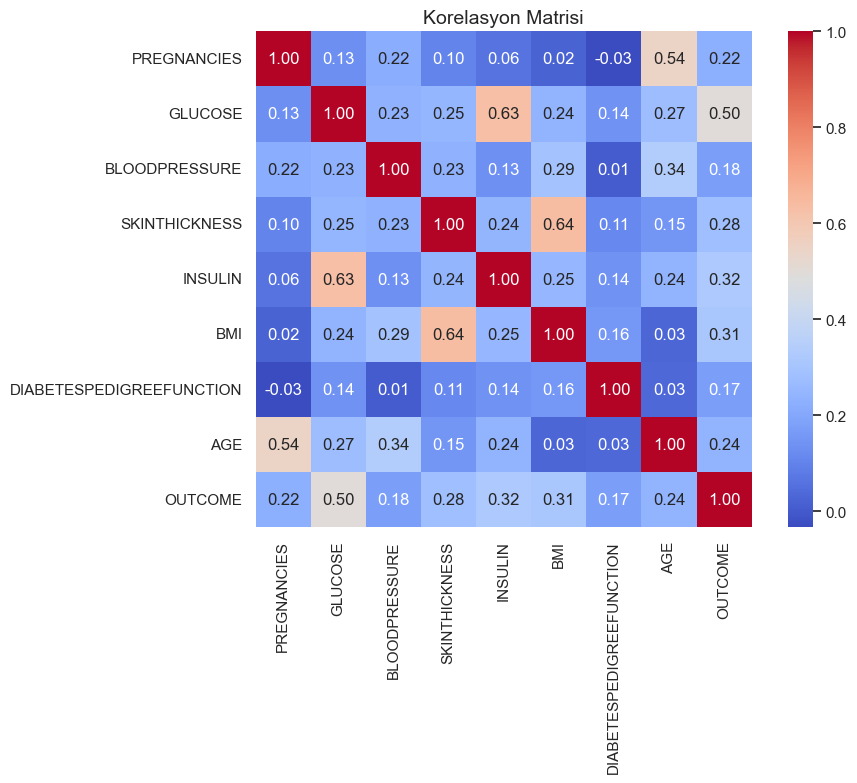

In [36]:
vp.plot_correlation_matrix(df_cleaned)

### Ne Öğrendik?
1. En Güçlü Belirteç: GLUCOSE
- Diyabet tanısında zaten temel kriter → modelde mutlaka yer almalı
2. Orta Düzey Belirteçler: INSULIN, BMI, SKINTHICKNESS
- Bu değişkenler birlikte kullanıldığında modelin gücünü artırabilir
- Özellikle INSULIN ve BMI kombinasyonu önemli olabilir
3. Dönüştürülmesi Faydalı Olanlar:
- AGE → yaş gruplarına ayrılabilir (örneğin: genç, orta yaş, yaşlı)
- PREGNANCIES → 0, 1–3, 4+ gibi kategorilere bölünebilir
- DIABETESPEDIGREEFUNCTION → log dönüşümü veya binning düşünülebilir

### Sonuç: Özellik Mühendisliği İçin 
Bu korelasyon analizi bize şunu söylüyor:
- Bazı değişkenler doğrudan güçlü sinyaller taşıyor (GLUCOSE, INSULIN)
- Bazıları ise dönüşümle daha anlamlı hale getirilebilir (AGE, PREGNANCIES, DPF)

# Feature Engineering

In [37]:
df_fe = fb.apply_all_feature_engineering(df_cleaned)

In [38]:
df_fe["INSULIN_FLAG"] = fb.add_insulin_flag(df_)["INSULIN_FLAG"]

In [39]:
df_fe.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,AGE_GROUP,BMI_CATEGORY,GLUCOSE_LEVEL,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,MATURE,Obese,Diabetes,YES,300.0,UNMEASURED
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0,MID,Overweight,Normal,YES,31.0,UNMEASURED
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1,MID,Normal,Diabetes,YES,256.0,UNMEASURED
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,YOUNG,Overweight,Normal,YES,21.0,MEASURED
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,MID,Obese,Diabetes,NO,0.0,MEASURED


In [40]:
df_lof, summary = ao.detect_lof_outliers(df_cleaned, visualize=False)

In [41]:
outlier_index = df_lof[df_lof["LOF_Outlier"] == -1].index
df_fe = fb.add_outlier_flag(df_fe, outlier_index)

In [45]:
df_fe.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME', 'AGE_GROUP',
       'BMI_CATEGORY', 'GLUCOSE_LEVEL', 'PREGNANCY_FLAG', 'AGE_X_PREGNANCIES',
       'INSULIN_FLAG', 'IS_OUTLIER'],
      dtype='object')

# Encode Scale

In [52]:
df_encoded = fes.encode_categorical_features(df_fe)

In [53]:
df_encoded.columns

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'OUTCOME', 'PREGNANCY_FLAG',
       'AGE_X_PREGNANCIES', 'INSULIN_FLAG', 'IS_OUTLIER', 'AGE_GROUP_MID',
       'AGE_GROUP_MATURE', 'AGE_GROUP_OLD', 'BMI_CATEGORY_Normal',
       'BMI_CATEGORY_Overweight', 'BMI_CATEGORY_Obese',
       'GLUCOSE_LEVEL_Prediabetes', 'GLUCOSE_LEVEL_Diabetes'],
      dtype='object')

In [54]:
pd.set_option("display.max_columns", None)
df_encoded.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG,IS_OUTLIER,AGE_GROUP_MID,AGE_GROUP_MATURE,AGE_GROUP_OLD,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_LEVEL_Prediabetes,GLUCOSE_LEVEL_Diabetes
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,YES,300.0,UNMEASURED,0,False,True,False,False,False,True,False,True
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0,YES,31.0,UNMEASURED,0,True,False,False,False,True,False,False,False
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1,YES,256.0,UNMEASURED,0,True,False,False,True,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,YES,21.0,MEASURED,0,False,False,False,False,True,False,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,NO,0.0,MEASURED,0,True,False,False,False,False,True,False,True


In [55]:
df_encoded["PREGNANCY_FLAG"] = df_encoded["PREGNANCY_FLAG"].map({"NO": 0, "YES": 1})
df_encoded["INSULIN_FLAG"] = df_encoded["INSULIN_FLAG"].map({"UNMEASURED": 0, "MEASURED": 1})

In [56]:
df_encoded.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG,IS_OUTLIER,AGE_GROUP_MID,AGE_GROUP_MATURE,AGE_GROUP_OLD,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_LEVEL_Prediabetes,GLUCOSE_LEVEL_Diabetes
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,1,300.0,0,0,False,True,False,False,False,True,False,True
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0,1,31.0,0,0,True,False,False,False,True,False,False,False
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1,1,256.0,0,0,True,False,False,True,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,21.0,1,0,False,False,False,False,True,False,False,False
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,0,0.0,1,0,True,False,False,False,False,True,False,True


In [58]:
bool_cols = df_encoded.select_dtypes(include="bool").columns
bool_cols

Index(['AGE_GROUP_MID', 'AGE_GROUP_MATURE', 'AGE_GROUP_OLD',
       'BMI_CATEGORY_Normal', 'BMI_CATEGORY_Overweight', 'BMI_CATEGORY_Obese',
       'GLUCOSE_LEVEL_Prediabetes', 'GLUCOSE_LEVEL_Diabetes'],
      dtype='object')

In [59]:
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

In [60]:
df_encoded.head()

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,OUTCOME,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG,IS_OUTLIER,AGE_GROUP_MID,AGE_GROUP_MATURE,AGE_GROUP_OLD,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_LEVEL_Prediabetes,GLUCOSE_LEVEL_Diabetes
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,1,300.0,0,0,0,1,0,0,0,1,0,1
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0,1,31.0,0,0,1,0,0,0,1,0,0,0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1,1,256.0,0,0,1,0,0,1,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,1,21.0,1,0,0,0,0,0,1,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1,0,0.0,1,0,1,0,0,0,0,1,0,1


In [ ]:
scaled_cols = ["PREGNANCIES", "BLOODPRESSURE", "SKINTHICKNESS","GLUCOSE", "BMI", "AGE", "DIABETESPEDIGREEFUNCTION","INSULIN", "AGE_X_PREGNANCIES"]
df_scaled, scaler = fes.scale_numerical_features(df_encoded, scaled_cols)

In [ ]:
import joblib
joblib.dump(scaler, "models/scaler.pkl")

In [ ]:
df_scaled.head()

In [ ]:
df_scaled["PREGNANCY_FLAG"] = df_scaled["PREGNANCY_FLAG"].map({"NO": 0, "YES": 1})
df_scaled["INSULIN_FLAG"] = df_scaled["INSULIN_FLAG"].map({"UNMEASURED": 0, "MEASURED": 1})
df_scaled["IS_OUTLIER"] = df_scaled["IS_OUTLIER"].astype(int)

In [ ]:
bool_cols = df_scaled.select_dtypes(include="bool").columns
df_scaled[bool_cols] = df_scaled[bool_cols].astype(int)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df_scaled.head()

# Modelign

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

def evaluate_models_on_balanced_and_unbalanced(df, target_col="OUTCOME", test_size=0.2, random_state=42):
    def evaluate_model(model, X_train, X_test, y_train, y_test):
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]
        return {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_prob)
        }

    def run_pipeline(df_input, label):
        X = df_input.drop(target_col, axis=1)
        y = df_input[target_col]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state, stratify=y
        )

        results = {}
        trained_models = {}
        models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state)
        }

        for name, model in models.items():
            metrics = evaluate_model(model, X_train, X_test, y_train, y_test)
            results[f"{label} - {name}"] = metrics
            trained_models[f"{label} - {name}"] = model

        return results, trained_models, X_train

    # Dengesiz
    unbalanced_results, unbalanced_models, X_unbalanced = run_pipeline(df, "Dengesiz")

    # Dengeli
    positive = df[df[target_col] == 1]
    negative = df[df[target_col] == 0].sample(n=len(positive), random_state=random_state)
    df_balanced = pd.concat([positive, negative]).sample(frac=1, random_state=random_state)
    balanced_results, balanced_models, X_balanced = run_pipeline(df_balanced, "Dengeli")

    all_results = {**unbalanced_results, **balanced_results}
    all_models = {**unbalanced_models, **balanced_models}
    all_X_train = {"Dengesiz": X_unbalanced, "Dengeli": X_balanced}

    return pd.DataFrame(all_results).T, all_models, all_X_train

In [ ]:
results_df, trained_models, X_trains = evaluate_models_on_balanced_and_unbalanced(df_scaled)
results_df.round(3)

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(results_df.round(3), annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Performans Karşılaştırması (Dengeli vs. Dengesiz)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
rf_model = trained_models["Dengeli - Random Forest"]
X_train = X_trains["Dengeli"]

rf_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# En önemli 15 özelliği görselleştir
plt.figure(figsize=(8, 6))
rf_importances.sort_values(ascending=False).head(15).plot(kind="barh", color="forestgreen")
plt.title("Random Forest – Feature Importance")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Örnek: Dengeli XGBoost
xgb_model = trained_models["Dengeli - XGBoost"]
X_train = X_trains["Dengeli"]

xgb_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importances.sort_values(ascending=False).head(15).plot(kind="barh", color="darkorange")
plt.title("XGBoost – Feature Importance (Dengeli Veri)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
import shap

In [ ]:
# SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

In [ ]:
shap.plots.beeswarm(shap_values, max_display=15)

In [ ]:
drop_cols = ["PREGNANCY_FLAG", "INSULIN_FLAG", "IS_OUTLIER"]
df_reduced = df_scaled.drop(columns=drop_cols)

In [ ]:
results_reduced, models_reduced, X_trains_reduced = evaluate_models_on_balanced_and_unbalanced(df_reduced)

In [ ]:
results_reduced.round(3)

In [ ]:
# Model ve veri
xgb_model = models_reduced["Dengeli - XGBoost"]
X_train = X_trains_reduced["Dengeli"]

# SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)
shap_values = explainer(X_train)

In [ ]:
shap.plots.beeswarm(shap_values, max_display=15)

In [ ]:
df_scaled.head()

In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

X = df_scaled.drop("OUTCOME", axis=1).values
y = df_scaled["OUTCOME"].values

rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
boruta_selector.fit(X, y)

selected_features = df_scaled.drop("OUTCOME", axis=1).columns[boruta_selector.support_].tolist()

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

X_selected = df_scaled[selected_features]
y = df_scaled["OUTCOME"]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, stratify=y, random_state=42)

stack_model.fit(X_train, y_train)
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
def evaluate_model_cv(model, X, y, cv=5):
    scores = {
        "Accuracy": cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean(),
        "Precision": cross_val_score(model, X, y, cv=cv, scoring="precision").mean(),
        "Recall": cross_val_score(model, X, y, cv=cv, scoring="recall").mean(),
        "F1 Score": cross_val_score(model, X, y, cv=cv, scoring="f1").mean(),
        "ROC AUC": cross_val_score(model, X, y, cv=cv, scoring="roc_auc").mean()
    }
    return scores


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l1", "l2"],
    "solver": ["liblinear"]
}

grid_log = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring="roc_auc")
grid_log.fit(X_train, y_train)
best_log_model = grid_log.best_estimator_


In [ ]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring="roc_auc")
grid_rf.fit(X_train, y_train)
best_rf_model1 = grid_rf.best_estimator_

In [ ]:
param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric="logloss"), param_grid_xgb, cv=5, scoring="roc_auc")
grid_xgb.fit(X_train, y_train)
best_xgb_model = grid_xgb.best_estimator_

In [ ]:
models = {
    "Logistic Regression (Tuned)": best_log_model,
    "Random Forest (Tuned)": best_rf_model1,
    "XGBoost (Tuned)": best_xgb_model
}

for name, model in models.items():
    scores = evaluate_model_cv(model, X_train, y_train)
    print(f"\n{name}")
    for metric, score in scores.items():
        print(f"{metric}: {score:.3f}")

In [ ]:
y_prob = best_rf_model1.predict_proba(X_test)[:, 1]  # Sadece pozitif sınıfın olasılığı

In [ ]:
thresholds = np.arange(0.1, 0.9, 0.05)
metrics = []

for thresh in thresholds:
    y_pred_thresh = (y_prob >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics.append([thresh, precision, recall, f1])

threshold_df = pd.DataFrame(metrics, columns=["Threshold", "Precision", "Recall", "F1 Score"])


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(threshold_df["Threshold"], threshold_df["Precision"], label="Precision", marker='o')
plt.plot(threshold_df["Threshold"], threshold_df["Recall"], label="Recall", marker='o')
plt.plot(threshold_df["Threshold"], threshold_df["F1 Score"], label="F1 Score", marker='o')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall-F1 vs. Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
optimal_thresh = 0.5
y_pred_optimal = (y_prob >= optimal_thresh).astype(int)

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred_optimal))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# KARAR

<table>
    <thead>
        <tr>
            <th style="text-align:left;">Metrik</th>
            <th style="text-align:left;">Rolü</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>F1 Score</strong></td>
            <td>Gerçek dünyada işe yarayan tahmin gücünü ölçer (precision ve recall dengesini yansıtır)</td>
        </tr>
        <tr>
            <td><strong>ROC AUC</strong></td>
            <td>Modelin genel ayrım kapasitesini gösterir (pozitif ve negatif sınıfları ayırt etme gücü)</td>
        </tr>
        <tr>
            <td><strong>Precision & Recall</strong></td>
            <td>Hataların türünü kontrol etmeni sağlar (kaçırmak mı, yanlış alarm mı?)</td>
        </tr>
    </tbody>
</table>

Neden Random Forest (Tuned) Modelini Seçtik?
- <strong>Yüksek F1 Score</strong> ile dengeli bir tahmin gücü sunuyor
- <strong>Yüksek ROC AUC</strong> ile sınıfları güçlü şekilde ayırt edebiliyor
- <strong>Precision ve Recall</strong> arasında anlamlı bir denge kuruyor
- Overfitting riski düşük, yorumlanabilirliği yüksek


In [ ]:
import joblib

joblib.dump(best_xgb_model, "models/random_forest_diabetes_model.pkl")

In [ ]:
joblib.dump(selected_features, "models/selected_features.pkl")

# Version 2

In [97]:
X = df_encoded.drop("OUTCOME", axis=1)
y = df_encoded["OUTCOME"]

In [98]:
X

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG,IS_OUTLIER,AGE_GROUP_MID,AGE_GROUP_MATURE,AGE_GROUP_OLD,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_LEVEL_Prediabetes,GLUCOSE_LEVEL_Diabetes
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1,300.0,0,0,0,1,0,0,0,1,0,1
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,1,31.0,0,0,1,0,0,0,1,0,0,0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1,256.0,0,0,1,0,0,1,0,0,0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,1,21.0,1,0,0,0,0,0,1,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,0,0.0,1,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,1,630.0,1,0,0,0,1,0,0,1,1,0
764,2.0,122.0,70.0,27.0,165.0,36.8,0.340,27.0,1,54.0,0,0,0,0,0,0,0,1,1,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,1,150.0,1,0,0,0,0,0,1,0,1,0
766,1.0,126.0,60.0,35.2,134.2,30.1,0.349,47.0,1,47.0,0,0,0,1,0,0,0,1,0,1


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [101]:
scaled_cols = ["PREGNANCIES", "BLOODPRESSURE", "SKINTHICKNESS","GLUCOSE", "BMI", "AGE", "DIABETESPEDIGREEFUNCTION","INSULIN", "AGE_X_PREGNANCIES"]
X_train, scaler = fes.scale_numerical_features(X_train, scaled_cols, method="robust")
X_test[scaled_cols] = scaler.transform(X_test[scaled_cols])

In [102]:
X_train

,PREGNANCIES,GLUCOSE,BLOODPRESSURE,SKINTHICKNESS,INSULIN,BMI,DIABETESPEDIGREEFUNCTION,AGE,PREGNANCY_FLAG,AGE_X_PREGNANCIES,INSULIN_FLAG,IS_OUTLIER,AGE_GROUP_MID,AGE_GROUP_MATURE,AGE_GROUP_OLD,BMI_CATEGORY_Normal,BMI_CATEGORY_Overweight,BMI_CATEGORY_Obese,GLUCOSE_LEVEL_Prediabetes,GLUCOSE_LEVEL_Diabetes
353,-0.4,-0.658537,-0.625,-1.416667,-0.879576,-0.585915,0.500951,-0.294118,1,-0.261062,1,0,0,0,0,0,1,0,0,0
711,0.4,0.219512,0.375,-0.166667,-1.081888,-0.315493,0.143310,0.647059,1,0.517699,1,1,1,0,0,0,1,0,0,1
373,-0.2,-0.292683,-0.875,0.916667,-0.388247,0.281690,-0.399493,-0.235294,1,-0.146018,1,0,0,0,0,0,0,1,1,0
46,-0.4,0.707317,-1.000,0.133333,0.326590,-0.304225,0.460368,0.000000,1,-0.238938,0,0,0,0,0,0,1,0,0,1
682,-0.6,-0.536585,-0.500,0.833333,-0.282274,1.374648,-0.041852,-0.411765,0,-0.367257,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,-0.2,0.414634,-0.125,-0.416667,-0.095376,-0.394366,0.404566,-0.352941,1,-0.163717,0,0,0,0,0,0,1,0,0,1
113,0.2,-1.000000,-0.625,0.116667,-0.841040,0.180282,0.021560,-0.235294,1,0.075221,0,0,0,0,0,0,0,1,0,0
556,-0.4,-0.487805,-0.125,0.916667,-0.145472,0.642254,-0.417248,0.058824,1,-0.234513,0,0,0,0,0,0,0,1,0,0
667,1.4,-0.146341,-0.125,-0.166667,-0.347784,-0.552113,-0.612555,0.647059,1,1.402655,0,0,1,0,0,0,1,0,1,0


In [69]:
import joblib
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap

C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [71]:
random_state = 42
models = {
            "Logistic Regression": LogisticRegression(max_iter=1000, random_state=random_state),
            "Random Forest": RandomForestClassifier(n_estimators=100, random_state=random_state),
            "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=random_state)
        }

In [72]:
models["Voting Ensemble"] = VotingClassifier(
    estimators=[
        ("lr", models["Logistic Regression"]),
        ("rf", models["Random Forest"]),
        ("xgb", models["XGBoost"])
    ],
    voting="soft"
)

In [74]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })


C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:13:14] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [75]:
results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression,0.746753,0.653061,0.592593,0.621359,0.834259
1,Voting Ensemble,0.727273,0.625000,0.555556,0.588235,0.829074
2,Random Forest,0.740260,0.645833,0.574074,0.607843,0.820185
3,XGBoost,0.733766,0.632653,0.574074,0.601942,0.800000


In [76]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]

# SHAP için sadece tree-based modeller desteklenir (XGBoost, RF)
if "XGBoost" in best_model_name:
    explainer = shap.Explainer(best_model)
    shap_values = explainer(X_test)

    shap.summary_plot(shap_values, X_test, plot_type="bar")
else:
    print(f"SHAP sadece tree-based modeller için uygulanabilir. '{best_model_name}' desteklenmiyor.")

SHAP sadece tree-based modeller için uygulanabilir. 'Logistic Regression' desteklenmiyor.


In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"],
        "solver": ["liblinear"]
    },
    "Random Forest": {
        "n_estimators": [100, 200],
        "max_depth": [4, 6, 8],
        "min_samples_split": [2, 5]
    },
    "XGBoost": {
        "n_estimators": [100, 150],
        "max_depth": [3, 4, 5],
        "learning_rate": [0.05, 0.1],
        "subsample": [0.8, 1.0]
    }
}

In [79]:
best_models = {}

for name, model in [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42))
]:
    print(f"🔍 Tuning: {name}")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring="roc_auc", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"✅ En iyi parametreler: {grid.best_params_}")

🔍 Tuning: Logistic Regression
✅ En iyi parametreler: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
🔍 Tuning: Random Forest
✅ En iyi parametreler: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200}
🔍 Tuning: XGBoost
✅ En iyi parametreler: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:41] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = []

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name + " (Tuned)",
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (Tuned),0.746753,0.653061,0.592593,0.621359,0.831481
1,XGBoost (Tuned),0.727273,0.625000,0.555556,0.588235,0.824630
2,Random Forest (Tuned),0.733766,0.638298,0.555556,0.594059,0.816852


In [81]:
voting_ensemble = VotingClassifier(
    estimators=[
        ("lr", best_models["Logistic Regression"]),
        ("rf", best_models["Random Forest"]),
        ("xgb", best_models["XGBoost"])
    ],
    voting="soft"  # soft: olasılık ortalaması, hard: sınıf oyu
)

voting_ensemble.fit(X_train, y_train)

C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:18:04] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, max_iter=1000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [82]:
y_pred = voting_ensemble.predict(X_test)
y_prob = voting_ensemble.predict_proba(X_test)[:, 1]

ensemble_result = {
    "Model": "Voting Ensemble (Tuned)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob)
}

In [83]:
results_df = pd.concat([results_df, pd.DataFrame([ensemble_result])], ignore_index=True)
results_df = results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (Tuned),0.746753,0.653061,0.592593,0.621359,0.831481
1,Voting Ensemble (Tuned),0.720779,0.617021,0.537037,0.574257,0.829444
2,XGBoost (Tuned),0.727273,0.625000,0.555556,0.588235,0.824630
3,Random Forest (Tuned),0.733766,0.638298,0.555556,0.594059,0.816852


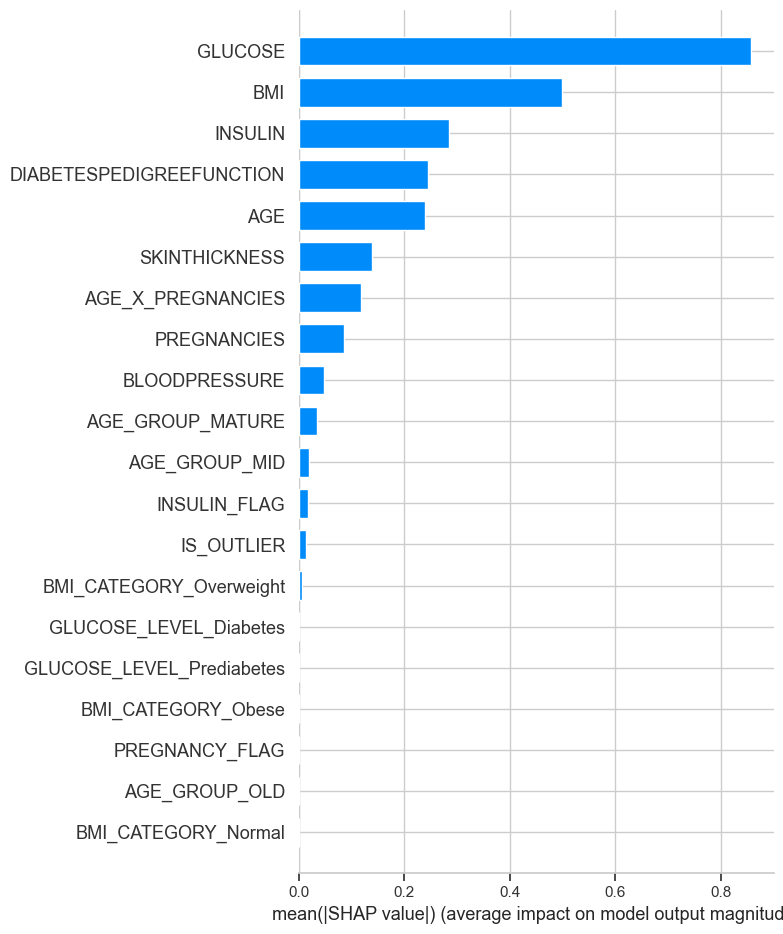

In [84]:
explainer = shap.Explainer(best_models["XGBoost"])
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")

In [103]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Özellik seçimi için model
selector_model = RandomForestClassifier(n_estimators=100, random_state=42)
selector_model.fit(X_train, y_train)

# Seçici nesne
selector = SelectFromModel(selector_model, threshold="median", prefit=True)

# Yeni veri setleri
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Seçilen sütun isimleri
selected_features = X_train.columns[selector.get_support()]
print("📌 Seçilen Özellikler:", list(selected_features))


📌 Seçilen Özellikler: ['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN', 'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'AGE_X_PREGNANCIES', 'GLUCOSE_LEVEL_Diabetes']


C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [108]:
joblib.dump(selected_features, "models/selected_features.pkl")

['models/selected_features1.pkl']

In [106]:
selected_features

Index(['PREGNANCIES', 'GLUCOSE', 'BLOODPRESSURE', 'SKINTHICKNESS', 'INSULIN',
       'BMI', 'DIABETESPEDIGREEFUNCTION', 'AGE', 'AGE_X_PREGNANCIES',
       'GLUCOSE_LEVEL_Diabetes'],
      dtype='object')

In [86]:
baseline_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

In [87]:
def evaluate_models(models, X_train, X_test, y_train, y_test, label_suffix=""):
    results = []
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        results.append({
            "Model": f"{name} {label_suffix}",
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred),
            "ROC AUC": roc_auc_score(y_test, y_prob)
        })
    return results

In [88]:
results_all = []

# 1. Orijinal veri ile baseline modeller
results_all += evaluate_models(baseline_models, X_train, X_test, y_train, y_test, "(All Features)")

# 2. Seçilen özelliklerle baseline modeller
results_all += evaluate_models(baseline_models, X_train_selected, X_test_selected, y_train, y_test, "(Selected Features)")

# 3. Orijinal veri ile fine-tuned modeller
results_all += evaluate_models(best_models, X_train, X_test, y_train, y_test, "(Tuned, All Features)")

# 4. Seçilen özelliklerle fine-tuned modeller
results_all += evaluate_models(best_models, X_train_selected, X_test_selected, y_train, y_test, "(Tuned, Selected Features)")

# Sonuçları tabloya dök
results_df = pd.DataFrame(results_all).sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
results_df

C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:34] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:34] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:24:34] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning:

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (All Features),0.746753,0.653061,0.592593,0.621359,0.834259
1,"Logistic Regression (Tuned, All Features)",0.746753,0.653061,0.592593,0.621359,0.831481
2,"XGBoost (Tuned, All Features)",0.727273,0.625000,0.555556,0.588235,0.824630
3,"Logistic Regression (Tuned, Selected Features)",0.701299,0.586957,0.500000,0.540000,0.822407
4,"XGBoost (Tuned, Selected Features)",0.733766,0.638298,0.555556,0.594059,0.822222
5,Logistic Regression (Selected Features),0.701299,0.586957,0.500000,0.540000,0.821667
6,Random Forest (All Features),0.740260,0.645833,0.574074,0.607843,0.820185
7,"Random Forest (Tuned, All Features)",0.733766,0.638298,0.555556,0.594059,0.816852
8,Random Forest (Selected Features),0.733766,0.638298,0.555556,0.594059,0.815463
9,"Random Forest (Tuned, Selected Features)",0.720779,0.622222,0.518519,0.565657,0.809444


In [89]:
voting_ensemble_selected = VotingClassifier(
    estimators=[
        ("lr", best_models["Logistic Regression"]),
        ("rf", best_models["Random Forest"]),
        ("xgb", best_models["XGBoost"])
    ],
    voting="soft"
)

# Seçilmiş özelliklerle eğit
voting_ensemble_selected.fit(X_train_selected, y_train)


C:\Users\omeru\anaconda3\envs\Diabetes-Detector\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:26:20] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1, max_iter=1000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=4,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds...
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [90]:
y_pred = voting_ensemble_selected.predict(X_test_selected)
y_prob = voting_ensemble_selected.predict_proba(X_test_selected)[:, 1]

ensemble_selected_result = {
    "Model": "Voting Ensemble (Tuned, Selected Features)",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC AUC": roc_auc_score(y_test, y_prob)
}


In [91]:
results_df = pd.concat([results_df, pd.DataFrame([ensemble_selected_result])], ignore_index=True)
results_df = results_df.sort_values(by="ROC AUC", ascending=False).reset_index(drop=True)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Logistic Regression (All Features),0.746753,0.653061,0.592593,0.621359,0.834259
1,"Logistic Regression (Tuned, All Features)",0.746753,0.653061,0.592593,0.621359,0.831481
2,"XGBoost (Tuned, All Features)",0.727273,0.625000,0.555556,0.588235,0.824630
3,"Logistic Regression (Tuned, Selected Features)",0.701299,0.586957,0.500000,0.540000,0.822407
4,"XGBoost (Tuned, Selected Features)",0.733766,0.638298,0.555556,0.594059,0.822222
5,Logistic Regression (Selected Features),0.701299,0.586957,0.500000,0.540000,0.821667
6,"Voting Ensemble (Tuned, Selected Features)",0.714286,0.613636,0.500000,0.551020,0.820370
7,Random Forest (All Features),0.740260,0.645833,0.574074,0.607843,0.820185
8,"Random Forest (Tuned, All Features)",0.733766,0.638298,0.555556,0.594059,0.816852
9,Random Forest (Selected Features),0.733766,0.638298,0.555556,0.594059,0.815463


In [92]:
baseline_models

{'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
 'Random Forest': RandomForestClassifier(random_state=42),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, ...)}

In [93]:
joblib.dump(baseline_models["Logistic Regression"], "models/best_model.pkl")

['models/best_model.pkl']

In [94]:
best_model = LogisticRegression(max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)
joblib.dump(best_model, "models/best_model.pkl")

['models/best_model.pkl']

In [107]:
all_features

['PREGNANCIES',
 'GLUCOSE',
 'BLOODPRESSURE',
 'SKINTHICKNESS',
 'INSULIN',
 'BMI',
 'DIABETESPEDIGREEFUNCTION',
 'AGE',
 'PREGNANCY_FLAG',
 'AGE_X_PREGNANCIES',
 'INSULIN_FLAG',
 'IS_OUTLIER',
 'AGE_GROUP_MID',
 'AGE_GROUP_MATURE',
 'AGE_GROUP_OLD',
 'BMI_CATEGORY_Normal',
 'BMI_CATEGORY_Overweight',
 'BMI_CATEGORY_Obese',
 'GLUCOSE_LEVEL_Prediabetes',
 'GLUCOSE_LEVEL_Diabetes']